In [72]:
import sys
from random import randint, seed
from tqdm.notebook import tqdm
from grafo import *

In [81]:
sys.path.insert(0, "..")

In [73]:

class Karger:

    def __init__(self, graph):
        self.graph = graph


    def run(self):
        nodes = [[i + 1] for i in range(len(self.graph))]
        super_nodes = [[i + 1] for i in range(len(graph))]
        key_node = len(nodes) 

        E = []
        for i in range(len(self.graph)):
            for j in range(i + 1, len(self.graph)):
                if self.graph.adjacency_matrix[i][j] == 1:
                    E.append((i + 1, j + 1))

        E_ = E.copy()
        while len(nodes) > 2:

            random_edge = E_[randint(0, len(E_) - 1)]
            key_node += 1

            nodes.append([key_node])
            nodes.remove([random_edge[0]])
            nodes.remove([random_edge[1]])
            
            list_aux = super_nodes[random_edge[0] - 1].copy()
            list_aux.extend(super_nodes[random_edge[1] - 1])
            super_nodes.append(list_aux)


            E_ = [edge for edge in E_ if edge != random_edge]

            for i, edge in enumerate(E_):
                if edge[0] == random_edge[0] or edge[0] == random_edge[1]:
                    if key_node > edge[1]:
                        E_[i] = (edge[1], key_node)
                    else:
                        E_[i] = (key_node, edge[1])

                elif edge[1] == random_edge[0] or edge[1] == random_edge[1]:
                    if key_node < edge[0]:
                        E_[i] = (key_node, edge[0])
                    else:
                        E_[i] = (edge[0], key_node)
            
        group_1 = super_nodes[E_[0][0] - 1] 
        group_2 = super_nodes[E_[0][1] - 1]

        cont_edges = 0

        for v1 in group_1:
            for v2 in group_2:
                if self.graph.adjacency_matrix[v1 - 1][v2 - 1] == 1:
                    cont_edges += 1

        return cont_edges

    def execute(self, n):
        min_cut = sys.maxsize
        for i in range(n):
            cut = self.run()
            if cut < min_cut:
                min_cut = cut

        return min_cut

In [78]:
name_file = "graph_type2_3"
arquivo_graph_1 = open(f"./Instancias/in/{name_file}", 'r').readlines()
matrix_, list_ = read_graph(arquivo_graph_1)
graph = Graph(matrix_, list_)

In [79]:
karger = Karger(graph)
min_cut = karger.execute(1000)
n_exec = 50
n_iter = 1000
list_min_cut = [None] * n_exec

for i in tqdm(range(n_exec)):
    list_min_cut[i] = karger.execute(n_iter)
    if list_min_cut[i] < min_cut:
        min_cut = list_min_cut[i]
print("min_cut: ", min_cut)

  0%|          | 0/50 [00:00<?, ?it/s]

min_cut:  9


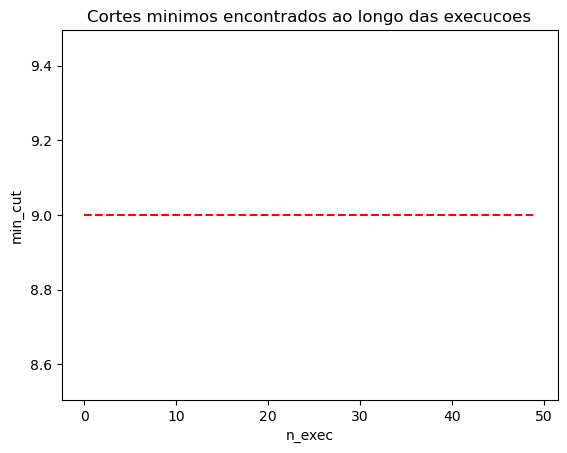

In [80]:
# plot line graph of min_cut
import matplotlib.pyplot as plt
plt.plot(list_min_cut, 'r--')
plt.title('Cortes minimos encontrados ao longo das execucoes')
plt.ylabel('min_cut')
plt.xlabel('n_exec')
plt.show()

In [77]:
n_exec = 100
n_iter = 1000

names_file = ["graph_type1", "graph_type2"]

for name_file in names_file:
    for i in tqdm(range(1, 3 + 1)):

        arquivo_graph = open(f"./Instancias/in/{name_file}_{i}", 'r').readlines()
        arquivo_out = open(f"./Instancias/out/{name_file}_{i}", 'r').readlines()
        matrix_, list_ = read_graph(arquivo_graph)
        
        graph = Graph(matrix_, list_)
        karger = Karger(graph)
        min_cut = karger.execute(1)

        for _ in tqdm(range(n_exec)):
            current_cut = karger.execute(n_iter)
            if current_cut < min_cut:
                min_cut = current_cut

        print(f"Min cut Karger de {name_file}_{i}: {min_cut}")
        print(f"Min cut real de {name_file}_{i}: {arquivo_out[0]}")


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Min cut Karger de graph_type1_1: 1
Min cut real de graph_type1_1: 1



  0%|          | 0/100 [00:00<?, ?it/s]

Min cut Karger de graph_type1_2: 2
Min cut real de graph_type1_2: 2



  0%|          | 0/100 [00:00<?, ?it/s]

Min cut Karger de graph_type1_3: 2
Min cut real de graph_type1_3: 2



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Min cut Karger de graph_type2_1: 1
Min cut real de graph_type2_1: 1



  0%|          | 0/100 [00:00<?, ?it/s]

Min cut Karger de graph_type2_2: 5
Min cut real de graph_type2_2: 5



  0%|          | 0/100 [00:00<?, ?it/s]

Min cut Karger de graph_type2_3: 9
Min cut real de graph_type2_3: 9

